# EDA for UPS

In this notebook we will make an exploratory analysis to answer the following question: Is it a good idea to invest 50,000$ on UPS knowing the current state of the stock?

In this order we will procced to dive into the historical data from UPS, taking a dive on how the stock behave in the past and take a look using statiscal modeling to see if we are on the right spot to ionvest on UPS.

## What we will cover

In this manner we will dive and understand and make some asumpotions on the market. The first thing to understand is that no matter how bad our investment criteria is, if we invest in a period long enough we are guarenteed that we will make money out investing in general ETFs that tracks the market. Now the idea of investing out of a single stock is to get the most our of it and make alpha, meaning that our invesment should get higher returns than the market otherwise we would just take an unnecessary risk if we compare it to buy and hold the market.

## Capital and variables

For our invesment requirements we will have the following:

- Capital to Invest: 50,000$
- Period of Time: 1 year
- Risk tolerance: Low

In [49]:
# Getting Necessary Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Fetching Data

For this analysis we need to fetch data from SPY (our benchmark), UPS (the asset in question) and FDX (A close competitor). For the 3 of them we will fetch daily data from the last 3 years and see how they compare to each other.

In [2]:
spy = yf.download('SPY', period='3y', interval='1d')
ups = yf.download('UPS', period='3y', interval='1d')
fdx = yf.download('FDX', period='3y', interval='1d')

/tmp/ipython-input-3284545670.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', period='3y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3284545670.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ups = yf.download('UPS', period='3y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3284545670.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fdx = yf.download('FDX', period='3y', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [3]:
spy.head(10)

Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2022-08-19  404.588470  407.578744  403.706709  407.310387   68016900
2022-08-22  396.164001  399.882686  395.253488  399.710148   77695600
2022-08-23  395.205505  398.147869  394.649604  395.732626   49105200
2022-08-24  396.470642  397.850744  394.285440  394.975476   49177800
2022-08-25  402.067871  402.115781  396.873208  397.975388   50942300
2022-08-26  388.458191  402.499074  388.400688  401.952795  103087000
2022-08-29  385.889679  388.966207  384.519142  385.477564   65370800
2022-08-30  381.653381  387.298503  379.535276  387.058898   85652400
2022-08-31  378.749451  384.557490  378.615287  383.301958   76029700
2022-09-01  379.937866  380.282884  373.823126  376.554636   78740100

In [4]:
ups.head(10)

Price            Close        High         Low        Open   Volume
Ticker             UPS         UPS         UPS         UPS      UPS
Date                                                               
2022-08-19  183.765320  184.611724  182.275318  184.188528  2704300
2022-08-22  181.975525  183.068794  180.891081  181.182032  3593500
2022-08-23  180.979294  183.077646  180.247511  182.143084  2088000
2022-08-24  179.013153  180.820568  178.863272  179.771385  2024000
2022-08-25  180.741196  180.776456  178.545847  179.577392  1984400
2022-08-26  175.389496  181.358368  175.336598  180.635410  2203900
2022-08-29  173.925995  175.918552  173.855460  174.816471  1928000
2022-08-30  171.968674  174.931067  171.589551  174.278631  2238000
2022-08-31  171.492554  172.964932  171.060547  172.118541  2627700
2022-09-01  173.344070  173.767266  170.258244  171.377962  2343300

In [5]:
fdx.head(10)

Price            Close        High         Low        Open   Volume
Ticker             FDX         FDX         FDX         FDX      FDX
Date                                                               
2022-08-19  217.103043  219.735671  215.707102  219.389030  1259200
2022-08-22  209.458099  213.514774  208.830378  213.027607  1867300
2022-08-23  211.041428  212.053259  208.877239  209.242621  1021200
2022-08-24  211.790955  213.055747  208.830412  210.685444  1104200
2022-08-25  213.636581  214.517250  210.807202  212.502965  1163900
2022-08-26  204.389603  214.920117  204.258440  213.964511  1547900
2022-08-29  203.049866  204.651936  201.185485  202.553321  1213000
2022-08-30  200.004974  205.167188  199.189894  204.558208  1420400
2022-08-31  197.503510  201.419672  197.138127  200.895008  1718200
2022-09-01  199.575974  199.802063  194.969505  197.305706  1582400

In [6]:
spy.columns = ["close", 'high', 'low', 'open', 'volume']
ups.columns = ["close", 'high', 'low', 'open', 'volume']
fdx.columns = ["close", 'high', 'low', 'open', 'volume']

In [7]:
spy = spy.reset_index()
ups = ups.reset_index()
fdx = fdx.reset_index()

## Basic Information

Now we will fetch some basic information of the dataframes to see how they are working, fetch for missing missing and get ready for EDA.

In [8]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    751 non-null    datetime64[ns]
 1   close   751 non-null    float64       
 2   high    751 non-null    float64       
 3   low     751 non-null    float64       
 4   open    751 non-null    float64       
 5   volume  751 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.3 KB


In [9]:
ups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    751 non-null    datetime64[ns]
 1   close   751 non-null    float64       
 2   high    751 non-null    float64       
 3   low     751 non-null    float64       
 4   open    751 non-null    float64       
 5   volume  751 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.3 KB


In [10]:
fdx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    751 non-null    datetime64[ns]
 1   close   751 non-null    float64       
 2   high    751 non-null    float64       
 3   low     751 non-null    float64       
 4   open    751 non-null    float64       
 5   volume  751 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.3 KB


In [11]:
# Looking for null values
spy.isnull().sum()

Date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [12]:
ups.isnull().sum()

Date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [13]:
fdx.isnull().sum()

Date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [14]:
spy.describe()

Date       close        high         low  \
count                            751  751.000000  751.000000  751.000000   
mean   2024-02-16 22:54:48.415446016  486.089958  488.620185  483.126408   
min              2022-08-19 00:00:00  343.138916  346.276218  335.006917   
25%              2023-05-18 12:00:00  403.103439  405.281177  401.026665   
50%              2024-02-16 00:00:00  490.255310  492.713803  487.718170   
75%              2024-11-13 12:00:00  563.357513  566.110114  560.145484   
max              2025-08-18 00:00:00  644.950012  646.190002  642.679993   
std                              NaN   84.563838   84.567243   84.392887   

             open        volume  
count  751.000000  7.510000e+02  
mean   485.961412  7.176868e+07  
min    336.065519  2.604870e+07  
25%    403.132571  5.424650e+07  
50%    489.597741  6.912240e+07  
75%    563.718526  8.569760e+07  
max    645.989990  2.566114e+08  
std     84.570656  2.684137e+07

In [15]:
ups.describe()

Date       close        high         low  \
count                            751  751.000000  751.000000  751.000000   
mean   2024-02-16 22:54:48.415446016  137.032721  138.372628  135.730288   
min              2022-08-19 00:00:00   84.500000   86.110001   84.279999   
25%              2023-05-18 12:00:00  123.328114  124.110023  122.033333   
50%              2024-02-16 00:00:00  138.981033  139.930512  137.638115   
75%              2024-11-13 12:00:00  155.433113  156.943614  154.046879   
max              2025-08-18 00:00:00  183.765320  184.611724  182.275318   
std                              NaN   22.409437   22.505065   22.179352   

             open        volume  
count  751.000000  7.510000e+02  
mean   137.088191  4.280249e+06  
min     85.019997  9.124000e+05  
25%    123.456166  2.759000e+06  
50%    138.695404  3.528000e+06  
75%    155.552163  4.820000e+06  
max    184.188528  4.117040e+07  
std     22.313320  2.950260e+06

## EDA

For this part we will take a look over the 3 stocks, looking at it's growth over time and finidng key patterns on its data.

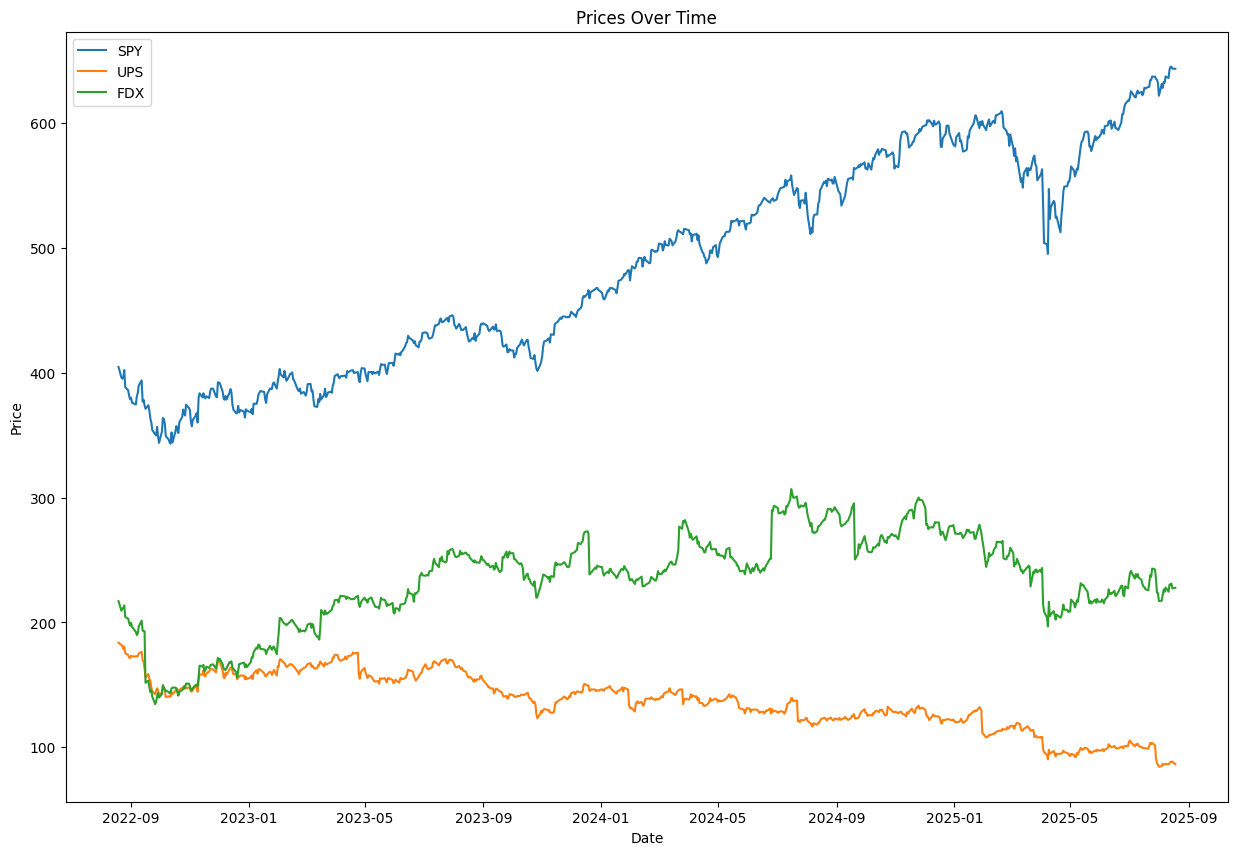

In [16]:
# Ploting the prices over time

plt.figure(figsize=(15, 10))
sns.lineplot(data=spy, x='Date', y='close', label='SPY')
sns.lineplot(data=ups, x='Date', y='close', label='UPS')
sns.lineplot(data=fdx, x='Date', y='close', label='FDX')
plt.title('Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Adding returns
spy['returns'] = spy['close'].pct_change()
ups['returns'] = ups['close'].pct_change()
fdx['returns'] = fdx['close'].pct_change()

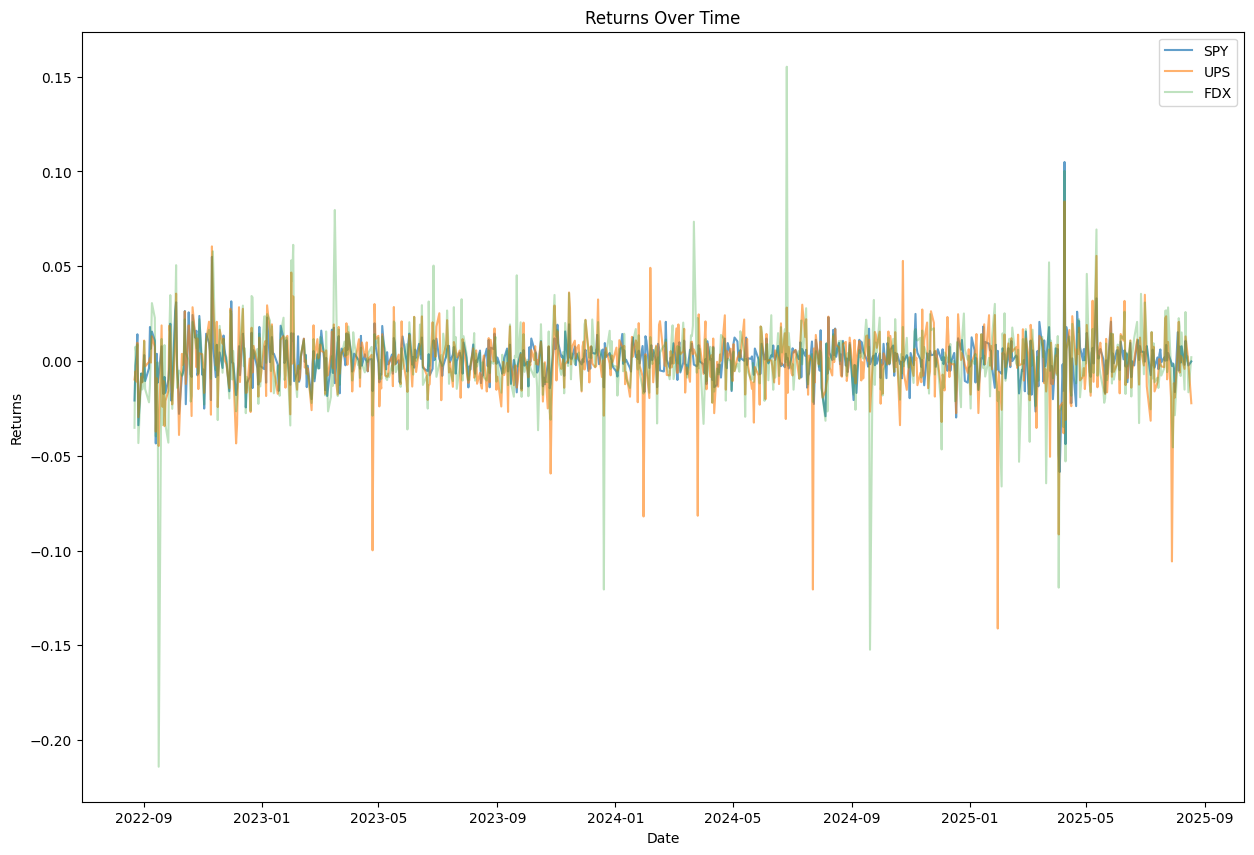

In [18]:
# Plotting the returns over time
plt.figure(figsize=(15, 10))
sns.lineplot(data=spy, x='Date', y='returns', label='SPY', alpha=0.7)
sns.lineplot(data=ups, x='Date', y='returns', label='UPS', alpha=0.6)
sns.lineplot(data=fdx, x='Date', y='returns', label='FDX', alpha=0.3)
plt.title('Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [19]:
# Adding log returns
spy['log_returns'] = np.log(1 + spy['returns'])
ups['log_returns'] = np.log(1 + ups['returns'])
fdx['log_returns'] = np.log(1 + fdx['returns'])

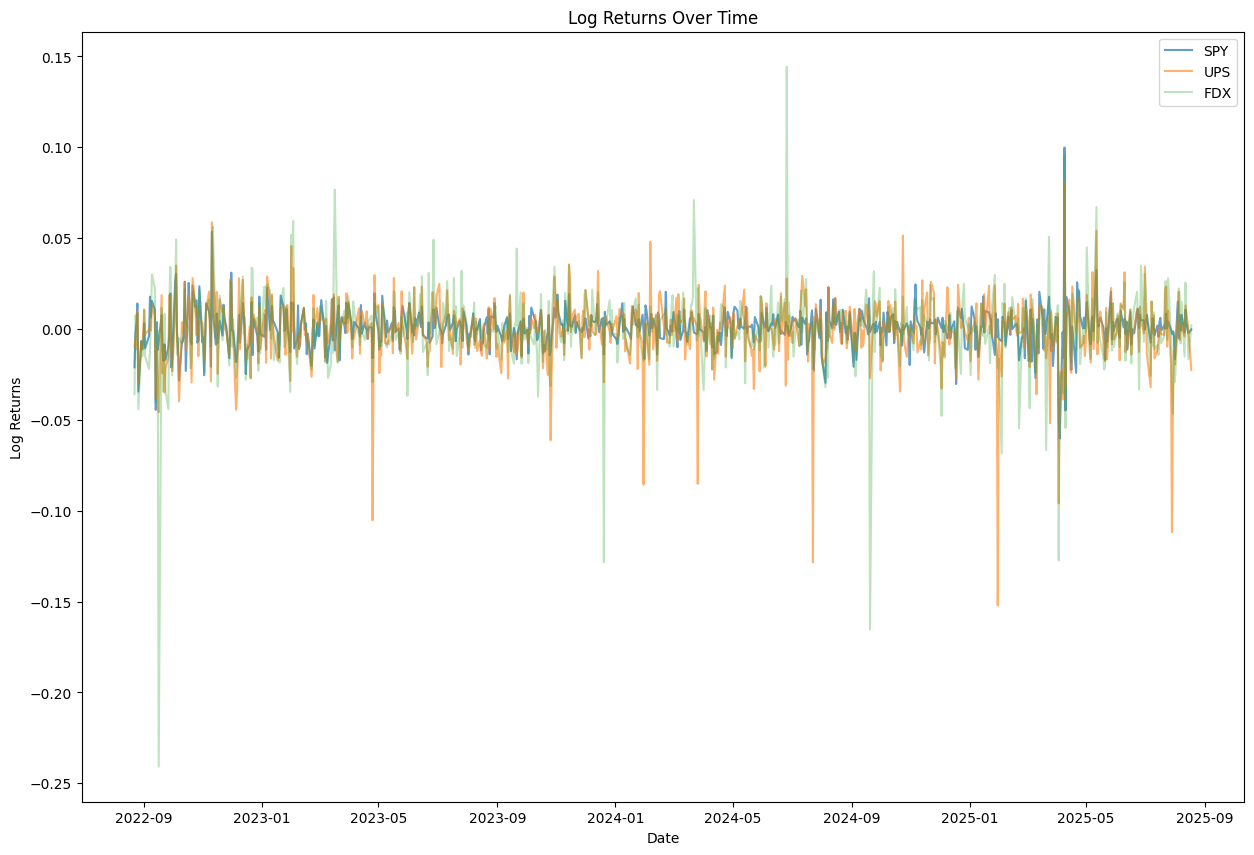

In [20]:
# Plotting log returns over time
plt.figure(figsize=(15, 10))
sns.lineplot(data=spy, x='Date', y='log_returns', label='SPY', alpha=0.7)
sns.lineplot(data=ups, x='Date', y='log_returns', label='UPS', alpha=0.6)
sns.lineplot(data=fdx, x='Date', y='log_returns', label='FDX', alpha=0.3)
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

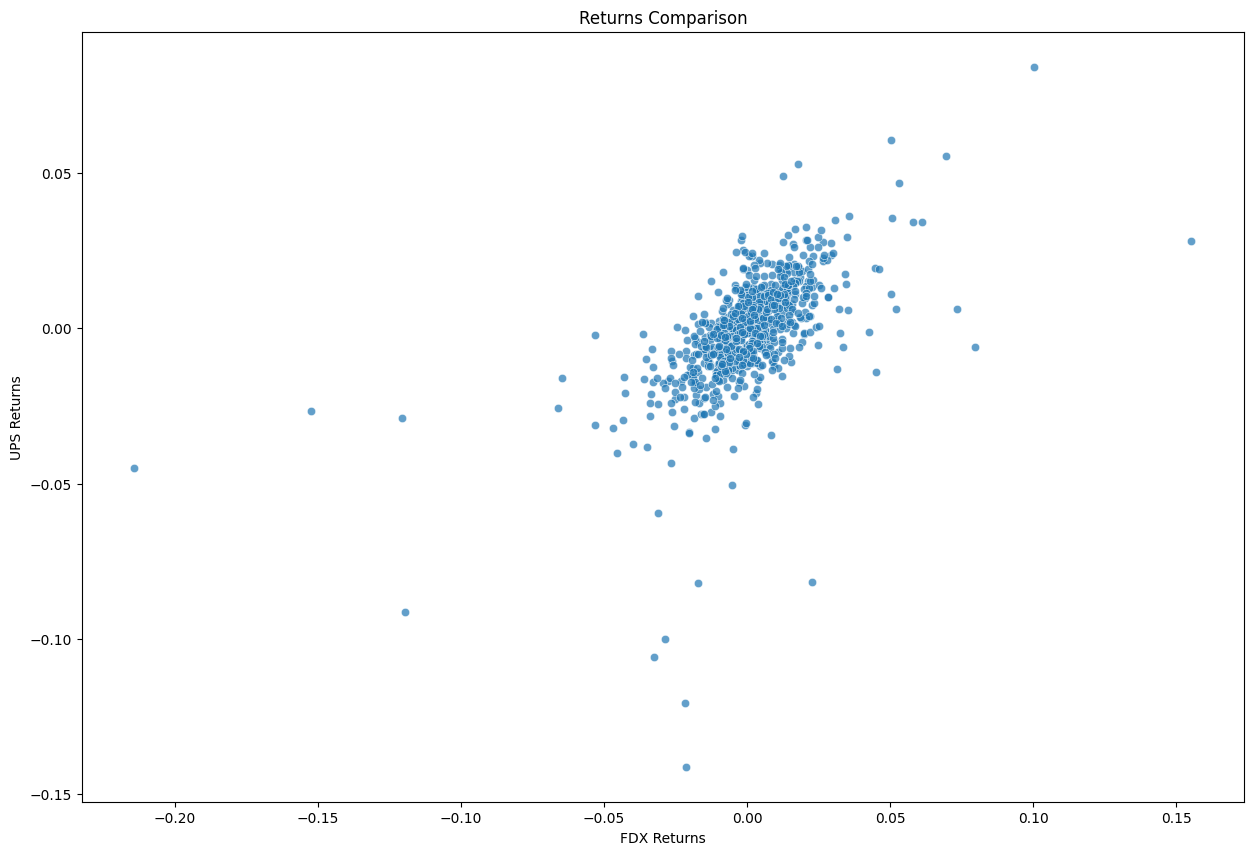

In [28]:
# Comparison Returns
plt.figure(figsize=(15, 10))
sns.scatterplot(x=fdx['returns'], y=ups['returns'], alpha=0.7)
plt.title('Returns Comparison')
plt.xlabel('FDX Returns')
plt.ylabel('UPS Returns')
plt.show()

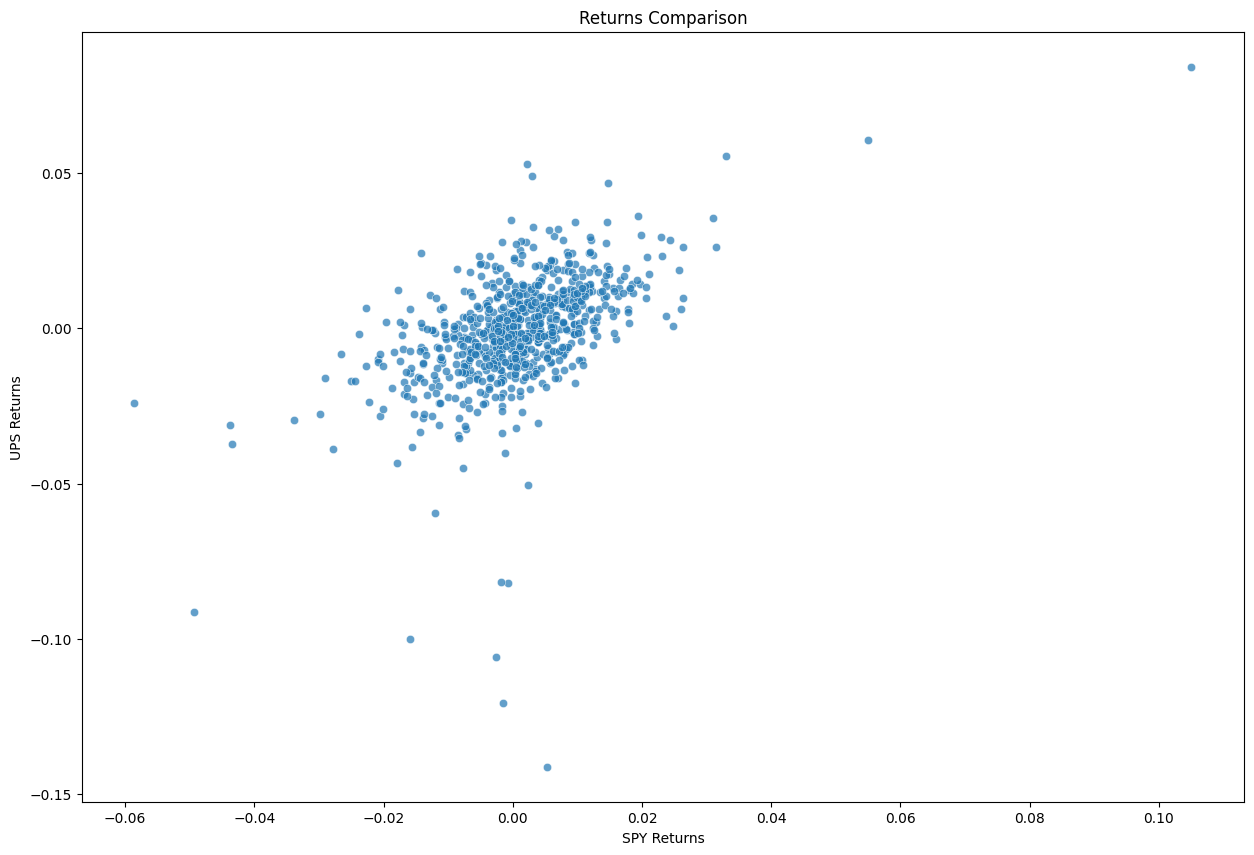

In [26]:
# Comparison Returns
plt.figure(figsize=(15, 10))
sns.scatterplot(x=spy['returns'], y=ups['returns'], alpha=0.7)
plt.title('Returns Comparison')
plt.xlabel('SPY Returns')
plt.ylabel('UPS Returns')
plt.show()

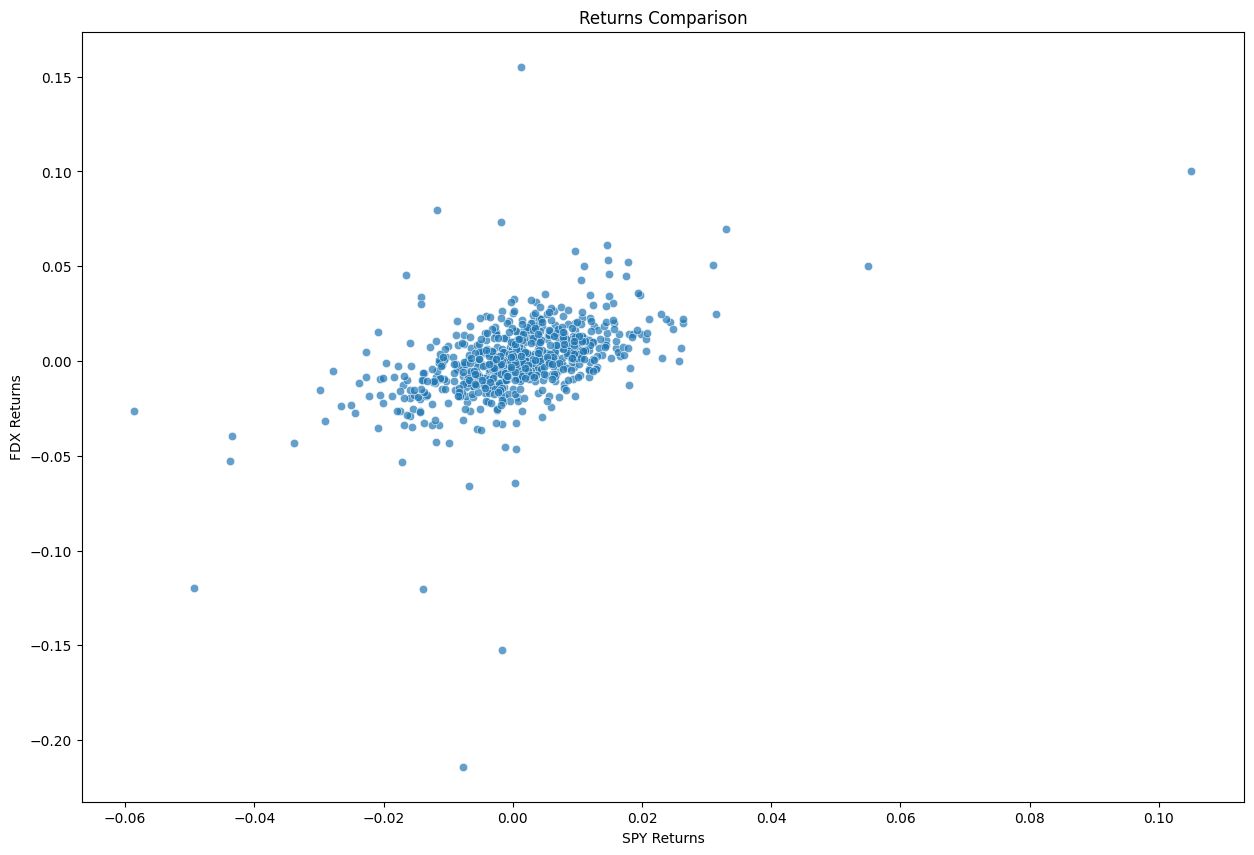

In [27]:
# Comparison Returns
plt.figure(figsize=(15, 10))
sns.scatterplot(x=spy['returns'], y=fdx['returns'], alpha=0.7)
plt.title('Returns Comparison')
plt.xlabel('SPY Returns')
plt.ylabel('FDX Returns')
plt.show()

## Notes So Far

What se can see so far from UPS and FDX is a that both move quite similar and tend to have very correlated returns, as well they both look highly correlated to the market. This means that the 3 assests should move quite similar, which in fact is not quite it. We can see how UPS is going downwards and FDX is hoidling its value over time, it looks that this problem arise since 2023 where UPS started to fall down over time.

In [40]:
# Getting risk free asset
risk_free = yf.download('^IRX', period='3y', interval='1d')

/tmp/ipython-input-99540816.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  risk_free = yf.download('^IRX', period='3y', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [41]:
risk_free.head(10)

Price       Close   High    Low   Open Volume
Ticker       ^IRX   ^IRX   ^IRX   ^IRX   ^IRX
Date                                         
2022-08-18  2.565  2.568  2.538  2.548      0
2022-08-19  2.580  2.580  2.558  2.573      0
2022-08-22  2.648  2.675  2.585  2.585      0
2022-08-23  2.703  2.720  2.655  2.718      0
2022-08-24  2.713  2.715  2.665  2.698      0
2022-08-25  2.730  2.730  2.700  2.705      0
2022-08-26  2.755  2.755  2.698  2.738      0
2022-08-29  2.798  2.813  2.750  2.750      0
2022-08-30  2.873  2.903  2.853  2.865      0
2022-08-31  2.860  2.870  2.840  2.863      0

In [42]:
risk_free.columns = ['close', 'high', 'low', 'open', 'volume']

In [43]:
risk_free.reset_index(inplace=True)

In [44]:
# Getting returns
risk_free['returns'] = risk_free['close'].pct_change()
risk_free['log_returns'] = np.log(1 + risk_free['returns'])

In [45]:
risk_free.head(10)

Date  close   high    low   open  volume   returns  log_returns
0 2022-08-18  2.565  2.568  2.538  2.548       0       NaN          NaN
1 2022-08-19  2.580  2.580  2.558  2.573       0  0.005848     0.005831
2 2022-08-22  2.648  2.675  2.585  2.585       0  0.026357     0.026015
3 2022-08-23  2.703  2.720  2.655  2.718       0  0.020770     0.020558
4 2022-08-24  2.713  2.715  2.665  2.698       0  0.003700     0.003693
5 2022-08-25  2.730  2.730  2.700  2.705       0  0.006266     0.006247
6 2022-08-26  2.755  2.755  2.698  2.738       0  0.009158     0.009116
7 2022-08-29  2.798  2.813  2.750  2.750       0  0.015608     0.015487
8 2022-08-30  2.873  2.903  2.853  2.865       0  0.026805     0.026452
9 2022-08-31  2.860  2.870  2.840  2.863       0 -0.004525    -0.004535

In [55]:
def to_simple_returns(df, use='returns'):
    """
    df: DataFrame with columns ['date', 'returns', 'log_returns']
    use: 'returns' or 'log_returns'
    returns a DataFrame with ['date', 'ret'] where 'ret' is simple daily return
    """
    out = df[['Date', use]].copy()
    out = out.dropna(subset=[use])
    if use == 'returns':
        out = out.rename(columns={use: 'ret'})
    elif use == 'log_returns':
        # convert log r to simple R: R = exp(r_log) - 1
        out['ret'] = np.exp(out[use]) - 1.0
        out = out.drop(columns=[use])
    else:
        raise ValueError("use must be 'returns' or 'log_returns'")
    return out

In [56]:
def build_excess_returns(df_stock, df_bench, df_rf=None,
                         stock_col='ret', bench_col='ret', rf_col='ret'):
    """
    Aligns on 'date' and returns a DataFrame with:
      ['date', 'excess_stock', 'excess_bench']
    If df_rf is None, rf is assumed 0.
    """
    # Left join on dates present in both (inner join to be strict)
    merged = (
        df_stock.rename(columns={stock_col: 'stock'})
        .merge(df_bench.rename(columns={bench_col: 'bench'}), on='Date', how='inner')
    )

    if df_rf is not None:
        merged = merged.merge(df_rf.rename(columns={rf_col: 'rf'}), on='Date', how='left')
        merged['rf'] = merged['rf'].fillna(0.0)
    else:
        merged['rf'] = 0.0

    merged['excess_stock'] = merged['stock'] - merged['rf']
    merged['excess_bench'] = merged['bench'] - merged['rf']

    return merged[['Date', 'excess_stock', 'excess_bench']].dropna()

In [59]:
def run_capm_sm(excess_df, hac_lags=5, annualize_alpha=True):
    """
    excess_df: DataFrame with columns ['date', 'excess_stock', 'excess_bench']
    Returns dict with alpha (daily & annualized), beta, t-stats, p-values, R^2, n
    """
    y = excess_df['excess_stock']          # dependent: stock excess return
    X = sm.add_constant(excess_df['excess_bench'])  # independent: bench excess
    model = sm.OLS(y, X, missing='drop')
    res = model.fit(cov_type='HAC', cov_kwds={'maxlags': hac_lags})

    alpha_daily = res.params['const']
    beta = res.params['excess_bench']

    # Annualize alpha: (1 + alpha_daily)^252 - 1
    alpha_ann = (1 + alpha_daily)**252 - 1 if annualize_alpha else alpha_daily

    return {
        'alpha_daily': alpha_daily,
        'alpha_ann': alpha_ann,
        'beta': beta,
        't_alpha': res.tvalues['const'],
        'p_alpha': res.pvalues['const'],
        't_beta': res.tvalues['excess_bench'],
        'p_beta': res.pvalues['excess_bench'],
        'r2': res.rsquared,
        'n': int(res.nobs),
        'res': res,
    }

In [60]:
def capm_for_two_stocks(
    df_stock1, df_stock2, df_bench, df_rf=None,
    use_returns='returns', hac_lags=5
):
    """
    df_*: each has columns ['date','returns','log_returns', ...]
    use_returns: choose which column to use: 'returns' or 'log_returns'
    """
    s1 = to_simple_returns(df_stock1, use=use_returns)
    s2 = to_simple_returns(df_stock2, use=use_returns)
    b  = to_simple_returns(df_bench,  use=use_returns)
    rf = to_simple_returns(df_rf,     use=use_returns) if df_rf is not None else None

    ex1 = build_excess_returns(s1, b, rf)
    ex2 = build_excess_returns(s2, b, rf)

    out1 = run_capm_sm(ex1, hac_lags=hac_lags)
    out2 = run_capm_sm(ex2, hac_lags=hac_lags)

    summary = pd.DataFrame([
        {'stock': 'stock1', 'beta': out1['beta'], 'alpha_ann': out1['alpha_ann'],
         't_alpha': out1['t_alpha'], 'p_alpha': out1['p_alpha'],
         't_beta': out1['t_beta'], 'p_beta': out1['p_beta'],
         'r2': out1['r2'], 'n': out1['n']},
        {'stock': 'stock2', 'beta': out2['beta'], 'alpha_ann': out2['alpha_ann'],
         't_alpha': out2['t_alpha'], 'p_alpha': out2['p_alpha'],
         't_beta': out2['t_beta'], 'p_beta': out2['p_beta'],
         'r2': out2['r2'], 'n': out2['n']},
    ])

    return summary, out1, out2

In [68]:
summary, s1_details, s2_details = capm_for_two_stocks(ups, fdx, spy, risk_free)

In [69]:
summary

stock      beta  alpha_ann   t_alpha   p_alpha     t_beta         p_beta  \
0  stock1  0.933753  -0.317692 -2.863337  0.004192  21.940026  1.078396e-106   
1  stock2  1.007839  -0.092581 -0.606147  0.544417  19.511495   8.767944e-85   

         r2    n  
0  0.406245  750  
1  0.358407  750

In [70]:
s1_details

{'alpha_daily': np.float64(-0.0015158115607409167),
 'alpha_ann': np.float64(-0.3176921393876474),
 'beta': np.float64(0.9337531959483119),
 't_alpha': np.float64(-2.8633373222143077),
 'p_alpha': np.float64(0.004192040139048078),
 't_beta': np.float64(21.940026162646262),
 'p_beta': np.float64(1.0783963776474345e-106),
 'r2': np.float64(0.4062454080014929),
 'n': 750,
 'res': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x797959107610>}

In [71]:
s2_details

{'alpha_daily': np.float64(-0.0003854434488471558),
 'alpha_ann': np.float64(-0.0925805465573416),
 'beta': np.float64(1.007839006167811),
 't_alpha': np.float64(-0.6061471151543286),
 'p_alpha': np.float64(0.5444170668770023),
 't_beta': np.float64(19.51149536425014),
 'p_beta': np.float64(8.767944135297908e-85),
 'r2': np.float64(0.35840726369247944),
 'n': 750,
 'res': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x797959401fd0>}

## Notes So Far

Using the CAPM we can find that UPS was underperforming the market constantly with a P-value of 0.004, which is stattistical significant. This means that UPS will constantly underperform the market over time and FDX will be close to the market with higher risk than the market. Based on this results, making an invesment in both FDX and UPS are bad idea over the period of 1 year, where just by entering SPY will give you better results over time.

In [72]:
summary, s1_details, s2_details = capm_for_two_stocks(ups, spy, fdx, risk_free)

In [73]:
summary

stock      beta  alpha_ann   t_alpha   p_alpha    t_beta        p_beta  \
0  stock1  0.567031  -0.277885 -2.458480  0.013953  9.797054  1.159172e-22   
1  stock2  0.355620   0.037982  0.392603  0.694612  7.083108  1.409563e-12   

         r2    n  
0  0.424564  750  
1  0.358407  750

## What the Evidence is Telling Us

So far we have strong evidence that UPS is actually underperforming the amrket and the peer. This is not just coincidence since the Alpha P-value < 0.05, meaning that is way better to just invest in SPY instead of investing in the in both UPS and FDX.

## Future Outlook

Knowing now we will take a possible future outlook for the stocks and see how they might performs in the future using the GBM.

In [78]:
def align_series(dfs, use_col="log_returns"):
    # inner-join on date across all series
    base = dfs[0][["Date", use_col, "close"]].rename(columns={use_col: "r0", "close":"S0"})
    for j, df in enumerate(dfs[1:], start=1):
        base = base.merge(df[["Date", use_col, "close"]].rename(columns={use_col: f"r{j}", "close":f"S{j}"}),
                          on="Date", how="inner")
    base = base.dropna()
    return base

In [79]:
def calibrate_from_log_returns(base):
    # Collect log-return columns in order r0, r1, ...
    r_cols = [c for c in base.columns if c.startswith("r")]
    R = base[r_cols].values  # shape (T, N)
    mu_daily_hat = R.mean(axis=0)              # E[log return] per day
    Sigma_daily = np.cov(R, rowvar=False)      # daily cov of log returns
    sig_daily = np.sqrt(np.diag(Sigma_daily))  # daily vols
    # GBM drift per day (real-world): mu ≈ mean_log + 0.5*var
    mu_daily_gbm = mu_daily_hat + 0.5 * (sig_daily**2)
    # Last prices S0 (vector)
    s_cols = [c for c in base.columns if c.startswith("S")]
    S0 = base[s_cols].iloc[-1].values.astype(float)
    return mu_daily_gbm, sig_daily, Sigma_daily, S0

In [80]:
def capm_drift_daily(betas, alpha_ann, rf_ann, mkt_prem_ann):
    """
    Returns daily drift vector per asset using CAPM + alpha.
    betas: array-like of betas (len N)
    alpha_ann: array-like of alphas (annualized) len N
    rf_ann, mkt_prem_ann: scalars (annualized, as decimals)
    """
    mu_ann = rf_ann + np.array(betas) * mkt_prem_ann + np.array(alpha_ann)  # per year
    mu_daily = mu_ann / 252.0
    return mu_daily

In [81]:
def simulate_gbm_paths(S0, mu_daily, sig_daily, Sigma_daily, n_days=252, n_paths=10000, seed=42):
    """
    Multivariate GBM with correlated shocks (constant mu, sigma, corr).
    Returns array paths with shape (n_assets, n_days+1, n_paths)
    """
    rng = np.random.default_rng(seed)
    n_assets = len(S0)
    # Correlation matrix and its Cholesky
    D = np.diag(sig_daily)
    # Avoid numerical issues: derive correlation from covariance
    with np.errstate(invalid='ignore'):
        invD = np.diag(1.0 / sig_daily)
    R = invD @ Sigma_daily @ invD
    # Clean any round-off
    R = (R + R.T) / 2.0
    # Ensure PD (jitter if needed)
    eps = 1e-12
    w, v = np.linalg.eigh(R)
    if np.min(w) < eps:
        w = np.clip(w, eps, None)
        R = (v * w) @ v.T
    L = np.linalg.cholesky(R)

    dt = 1.0  # one trading day as 1 step; mu_daily & sig_daily are already daily
    paths = np.zeros((n_assets, n_days + 1, n_paths), dtype=np.float64)
    paths[:, 0, :] = S0[:, None]

    # Pre-broadcast
    mu_term = (mu_daily - 0.5 * (sig_daily ** 2)) * dt
    sig_sqrt_dt = sig_daily * np.sqrt(dt)

    for t in range(1, n_days + 1):
        Z = rng.standard_normal((n_assets, n_paths))
        # correlate shocks
        eps_t = L @ Z  # correlated N(0,1)
        dlogS = mu_term[:, None] + (sig_sqrt_dt[:, None] * eps_t)
        paths[:, t, :] = paths[:, t - 1, :] * np.exp(dlogS)

    return paths

In [87]:
def _bands_from_paths(asset_paths, percentiles=(5, 25, 50, 75, 95)):
    """asset_paths: (T+1, Npaths) array -> dict of percentile series."""
    return {p: np.percentile(asset_paths, p, axis=1) for p in percentiles}

In [91]:
def plot_fan_charts_seaborn(paths, labels=None, show_samples=10, style="darkgrid"):
    """
    Plot Monte Carlo fan charts using Seaborn styling.

    Parameters
    ----------
    paths : np.ndarray
        Shape (n_assets, n_days+1, n_paths). Prices per asset over time.
    labels : list[str], optional
        Names for each asset (len = n_assets).
    show_samples : int
        Number of random individual paths to overlay.
    style : str
        Seaborn style (e.g., 'darkgrid', 'whitegrid', 'white').

    Notes
    -----
    - Creates ONE figure per asset (no subplots).
    - Shades P5–P95 and P25–P75 bands, draws median, and overlays sample paths.
    """
    sns.set_theme(style=style, context="talk")
    n_assets, T_plus_1, n_paths = paths.shape
    days = np.arange(T_plus_1)
    if labels is None:
        labels = [f"Asset {i+1}" for i in range(n_assets)]

    rng = np.random.default_rng(123)

    for i in range(n_assets):
        asset_paths = paths[i]  # (T+1, Npaths)
        bands = _bands_from_paths(asset_paths, percentiles=(5, 25, 50, 75, 95))

        plt.figure(figsize=(16, 10))
        # Shaded percentile bands (use Matplotlib fill with Seaborn styling)
        plt.fill_between(days, bands[5],  bands[95], alpha=0.20, label="P5–P95")
        plt.fill_between(days, bands[25], bands[75], alpha=0.30, label="P25–P75")

        # Median line via seaborn
        sns.lineplot(x=days, y=bands[50], linewidth=2.2, label="Median (P50)")

        # Overlay a few random sample paths
        k = min(show_samples, n_paths)
        idx = rng.choice(n_paths, size=k, replace=False)
        for j in idx:
            sns.lineplot(x=days, y=asset_paths[:, j], linewidth=0.9, alpha=0.45)

        plt.title(f"{labels[i]} — Monte Carlo Paths (Fan Chart)")
        plt.xlabel("Days")
        plt.ylabel("Price")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [92]:
base = align_series([ups, fdx, spy])
mu_hist_daily, sig_daily, Sigma_daily, S0 = calibrate_from_log_returns(base)

In [93]:
betas = [s1_details['beta'], s2_details['beta'], 1.0]       # beta_bench ~ 1 by def.
alphas_ann = [s1_details['alpha_ann'], s2_details['alpha_ann'], 0.0]           # benchmark alpha = 0
rf_ann = risk_free['returns'].iloc[-1]                                       # example 4% risk-free
mkt_prem_ann = 0.05                                  # example 5% equity premium
mu_capm_daily = capm_drift_daily(betas, alphas_ann, rf_ann, mkt_prem_ann)

In [94]:
mu_daily = mu_capm_daily

In [95]:
paths = simulate_gbm_paths(S0, mu_daily, sig_daily, Sigma_daily, n_days=252, n_paths=20000, seed=7)

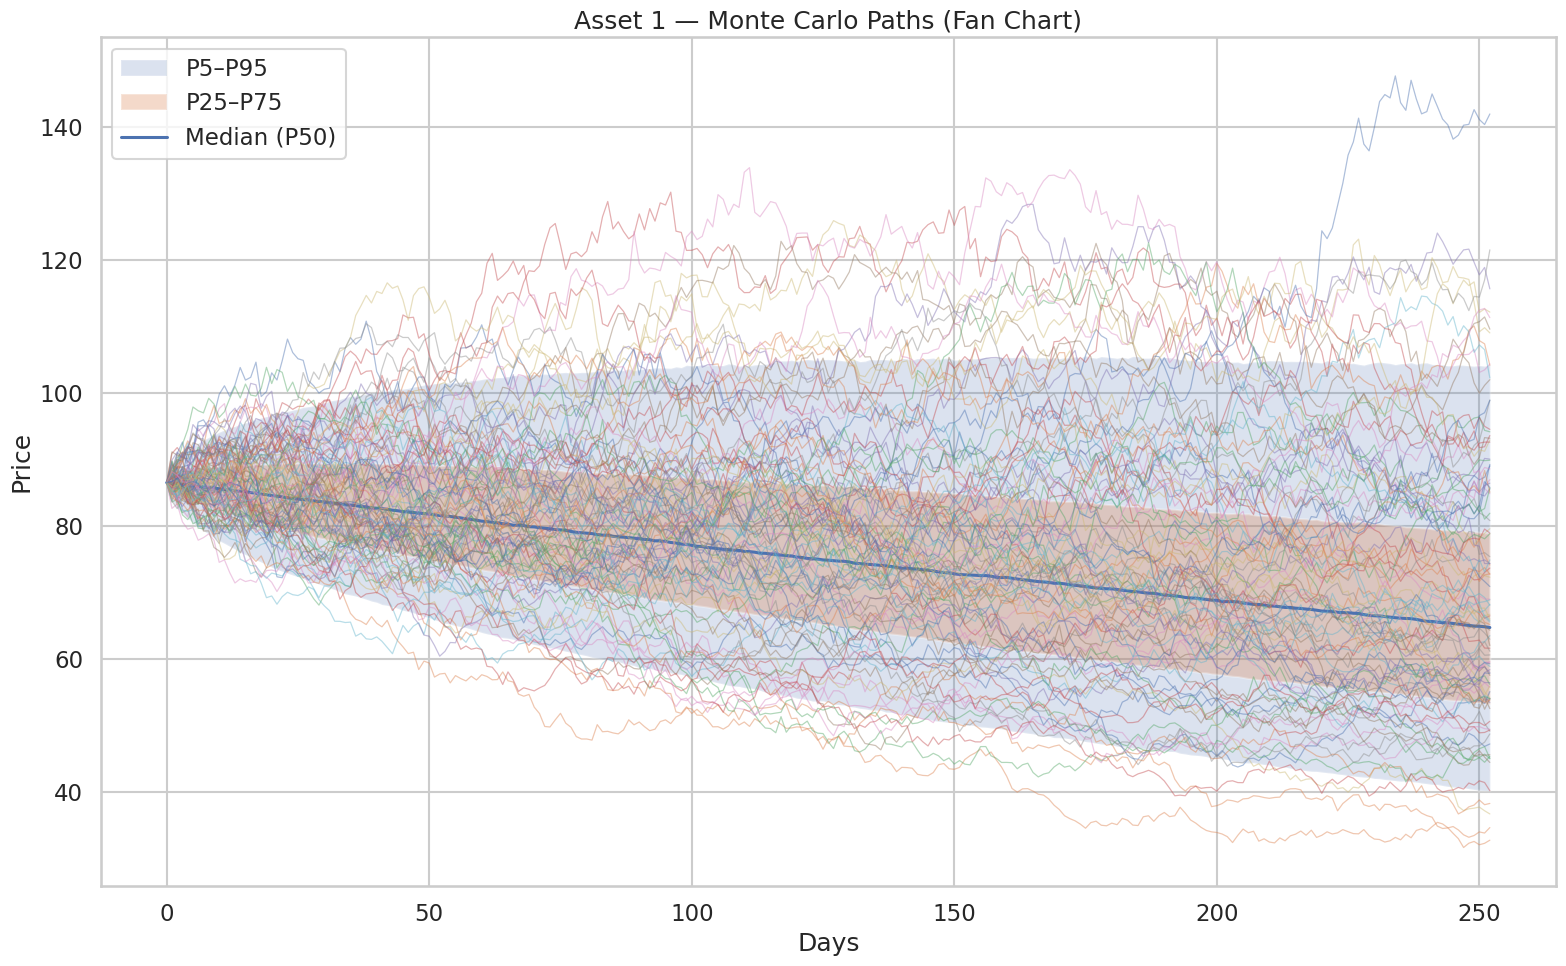

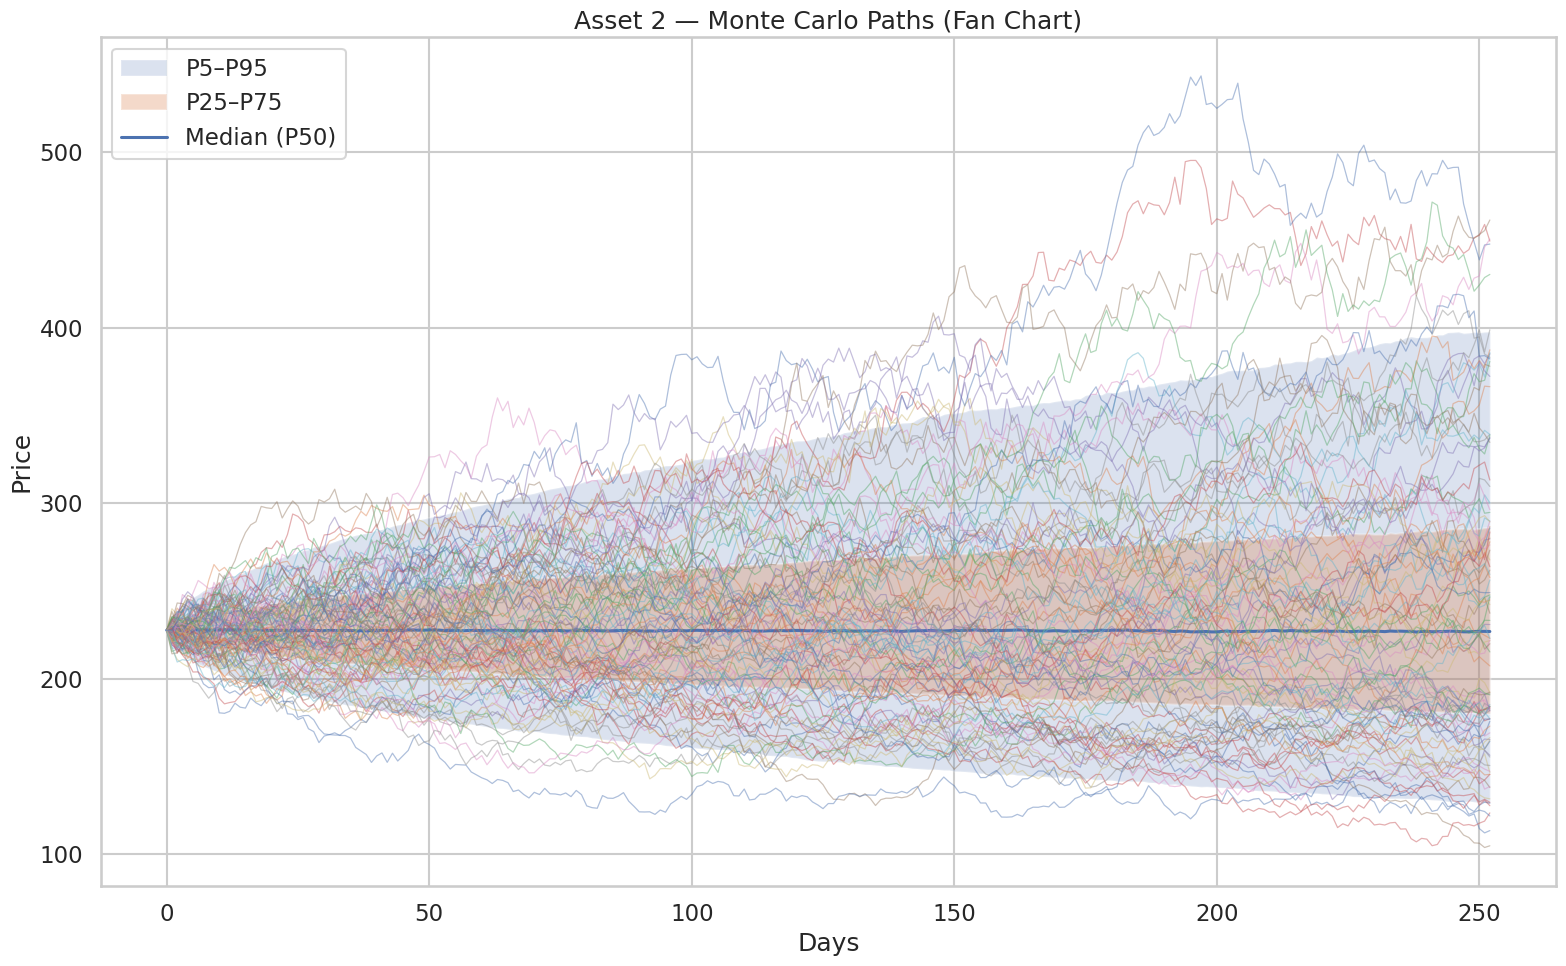

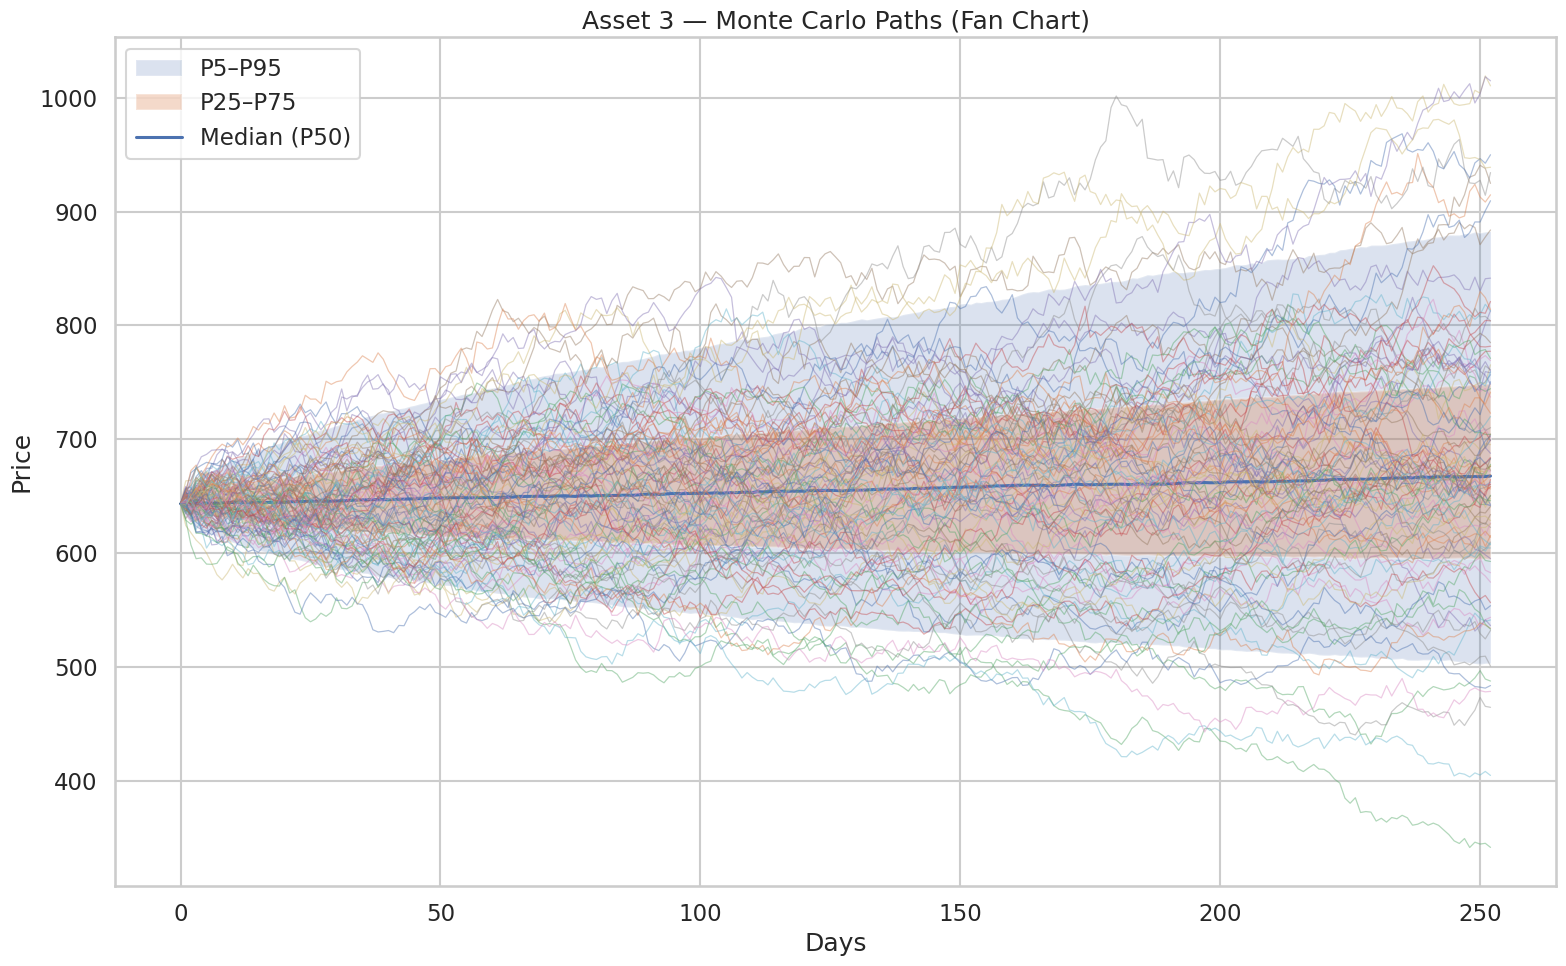

In [96]:
plot_fan_charts_seaborn(paths, show_samples=100, style="whitegrid")

# Conlusions

After making the respective analysis we can how UPS tneds on average to loose its value and by making some statistical test we how the stock constantly looses value over time and how there peers tneds to move with the market. This give us clear evidence that investing with UPS over a period of 1 year in fact is not a good idea and just by buying SPY we will have way better results with less risk over time.